In [2]:

import fiona
import rasterio
import numpy as np
import pandas as pd
import rasterio.mask
import shapefile as shp
import matplotlib.pyplot as plt

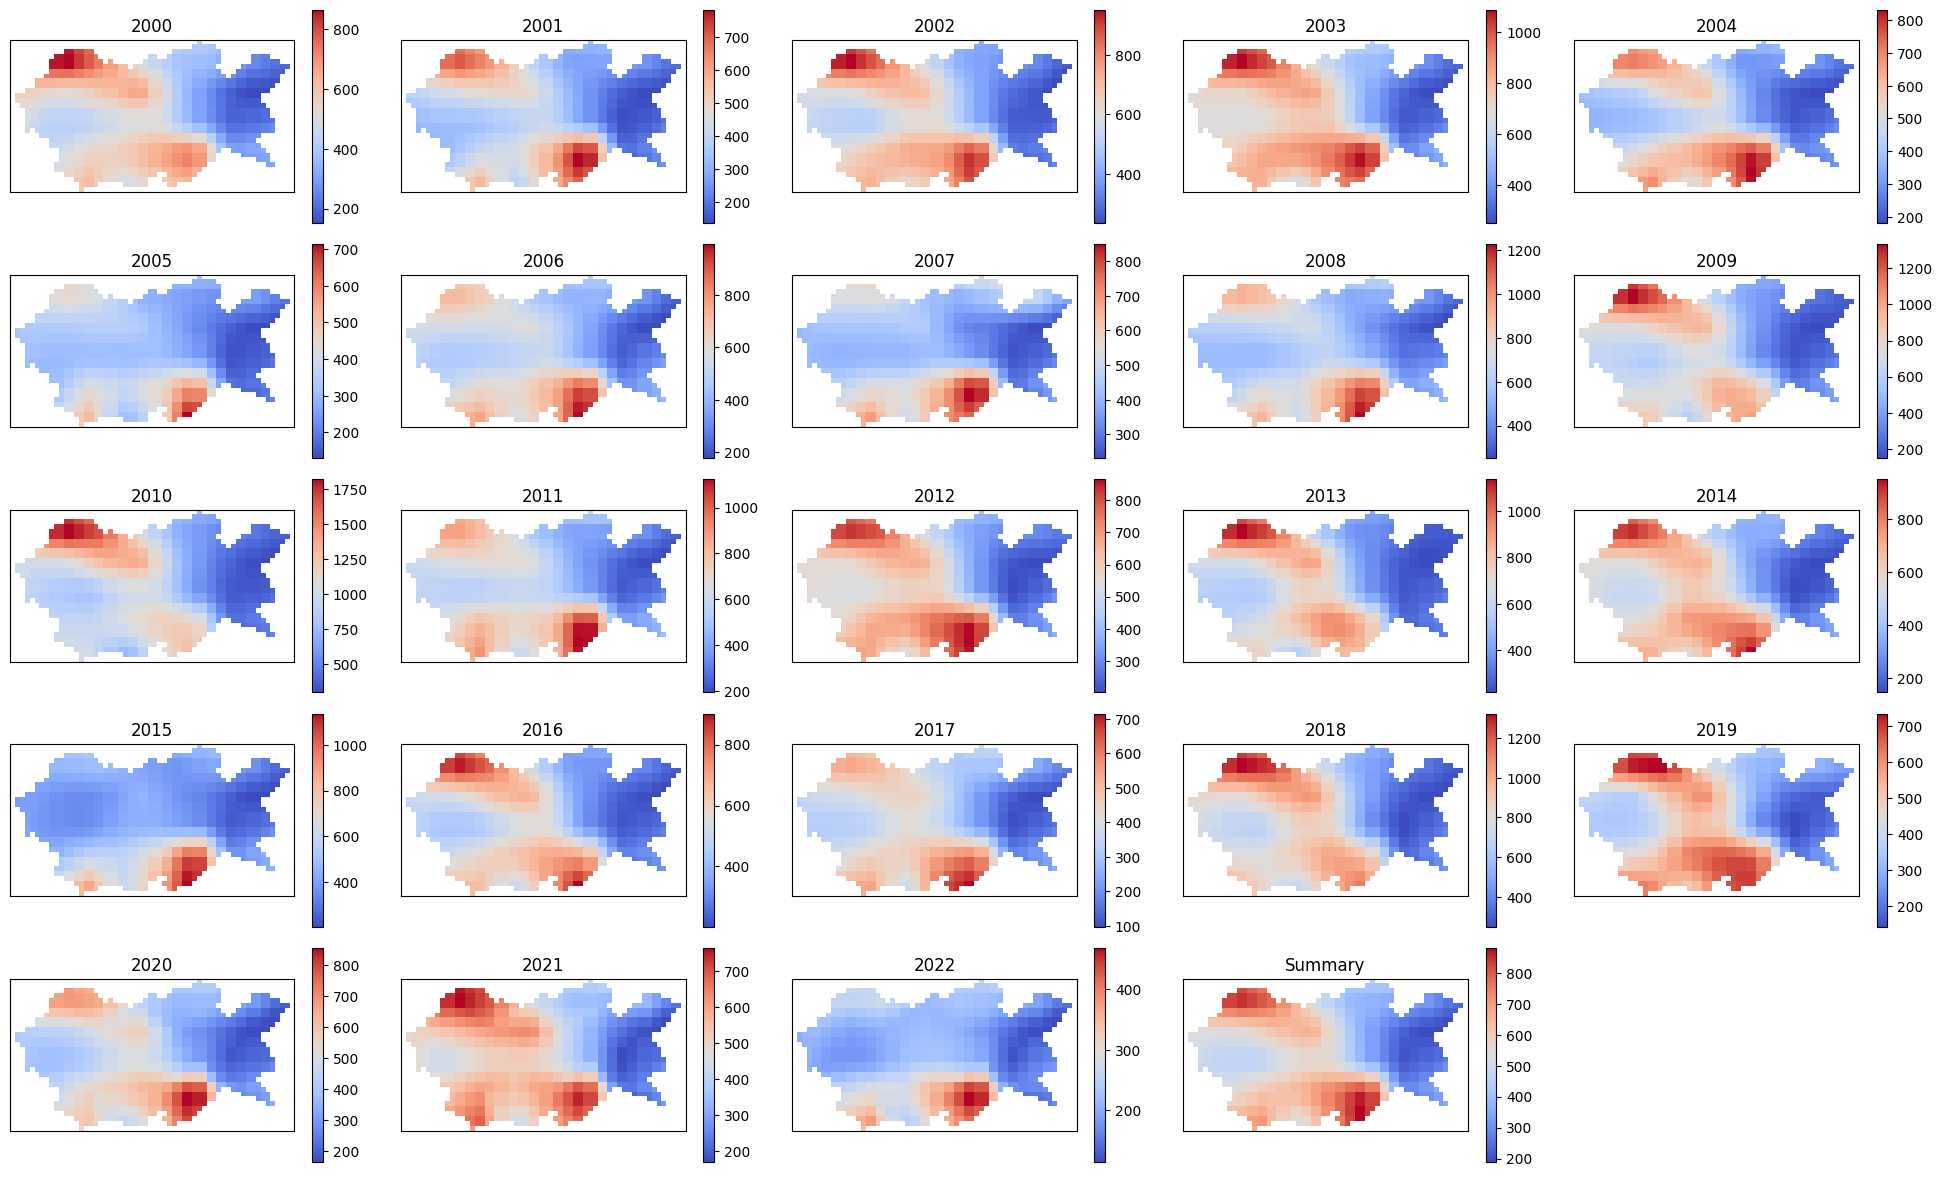

In [29]:
def set_plot_ticks(ax, font='Arial', style='normal', size=20, weight='normal', x_rot=0, y_rot=0, bottom_ticks=True, left_ticks=True):
    '''
    --- this function is used to set properties of x/y label ticks, including fonts, size, weight, rotation, etc.
    --- argument:
        --- ax: matplotlib.axes, the current axes object
    '''
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    for label in labels:
        label.set_fontname(font)
        label.set_style(style)
        label.set_fontsize(size)
        label.set_weight(weight)
        label.set_color('k')
    for l_x in ax.get_xticklabels():
        l_x.set_rotation(x_rot)
    for l_y in ax.get_yticklabels():
        l_y.set_rotation(y_rot)
    
    ax.tick_params(
            axis='both',  # changes apply to the x-axis
            which='both',  # both major and minor ticks are affected
            bottom=False,  # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            left=False,
            right=False,
            labelbottom=bottom_ticks,
            labelleft=left_ticks
            )
plt.figure(figsize=(20, 12))
with fiona.open(r"G:\My Drive\elinor_climate_input\shp\new_subhumid.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
plot_title = [str(i) for i in range(2000, 2023)] + ["Summary"]
for idx, year in enumerate(plot_title):
    with rasterio.open(r"G:\My Drive\elinor_climate_input\GEE_results\prcp_sum_" + year + ".tif") as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta
        out_image = out_image.squeeze()
        out_image[out_image==0] = float('nan')
    max_v = out_image.max()
    min_v = out_image.min()
    plt.subplot(5,5,idx+1)
    plt.title(year)
    fig = plt.imshow(out_image, cmap='coolwarm')
    plt.colorbar(fig, ax=plt.gca())
    set_plot_ticks(plt.gca(), bottom_ticks=False, left_ticks=False)
plt.subplots_adjust(top=0.98, left=0.02, right=0.98, bottom=0.02, hspace=0.1, wspace=0.1)
plt.savefig(r"G:\My Drive\elinor_climate_input\figures\prcp_sum.jpg")


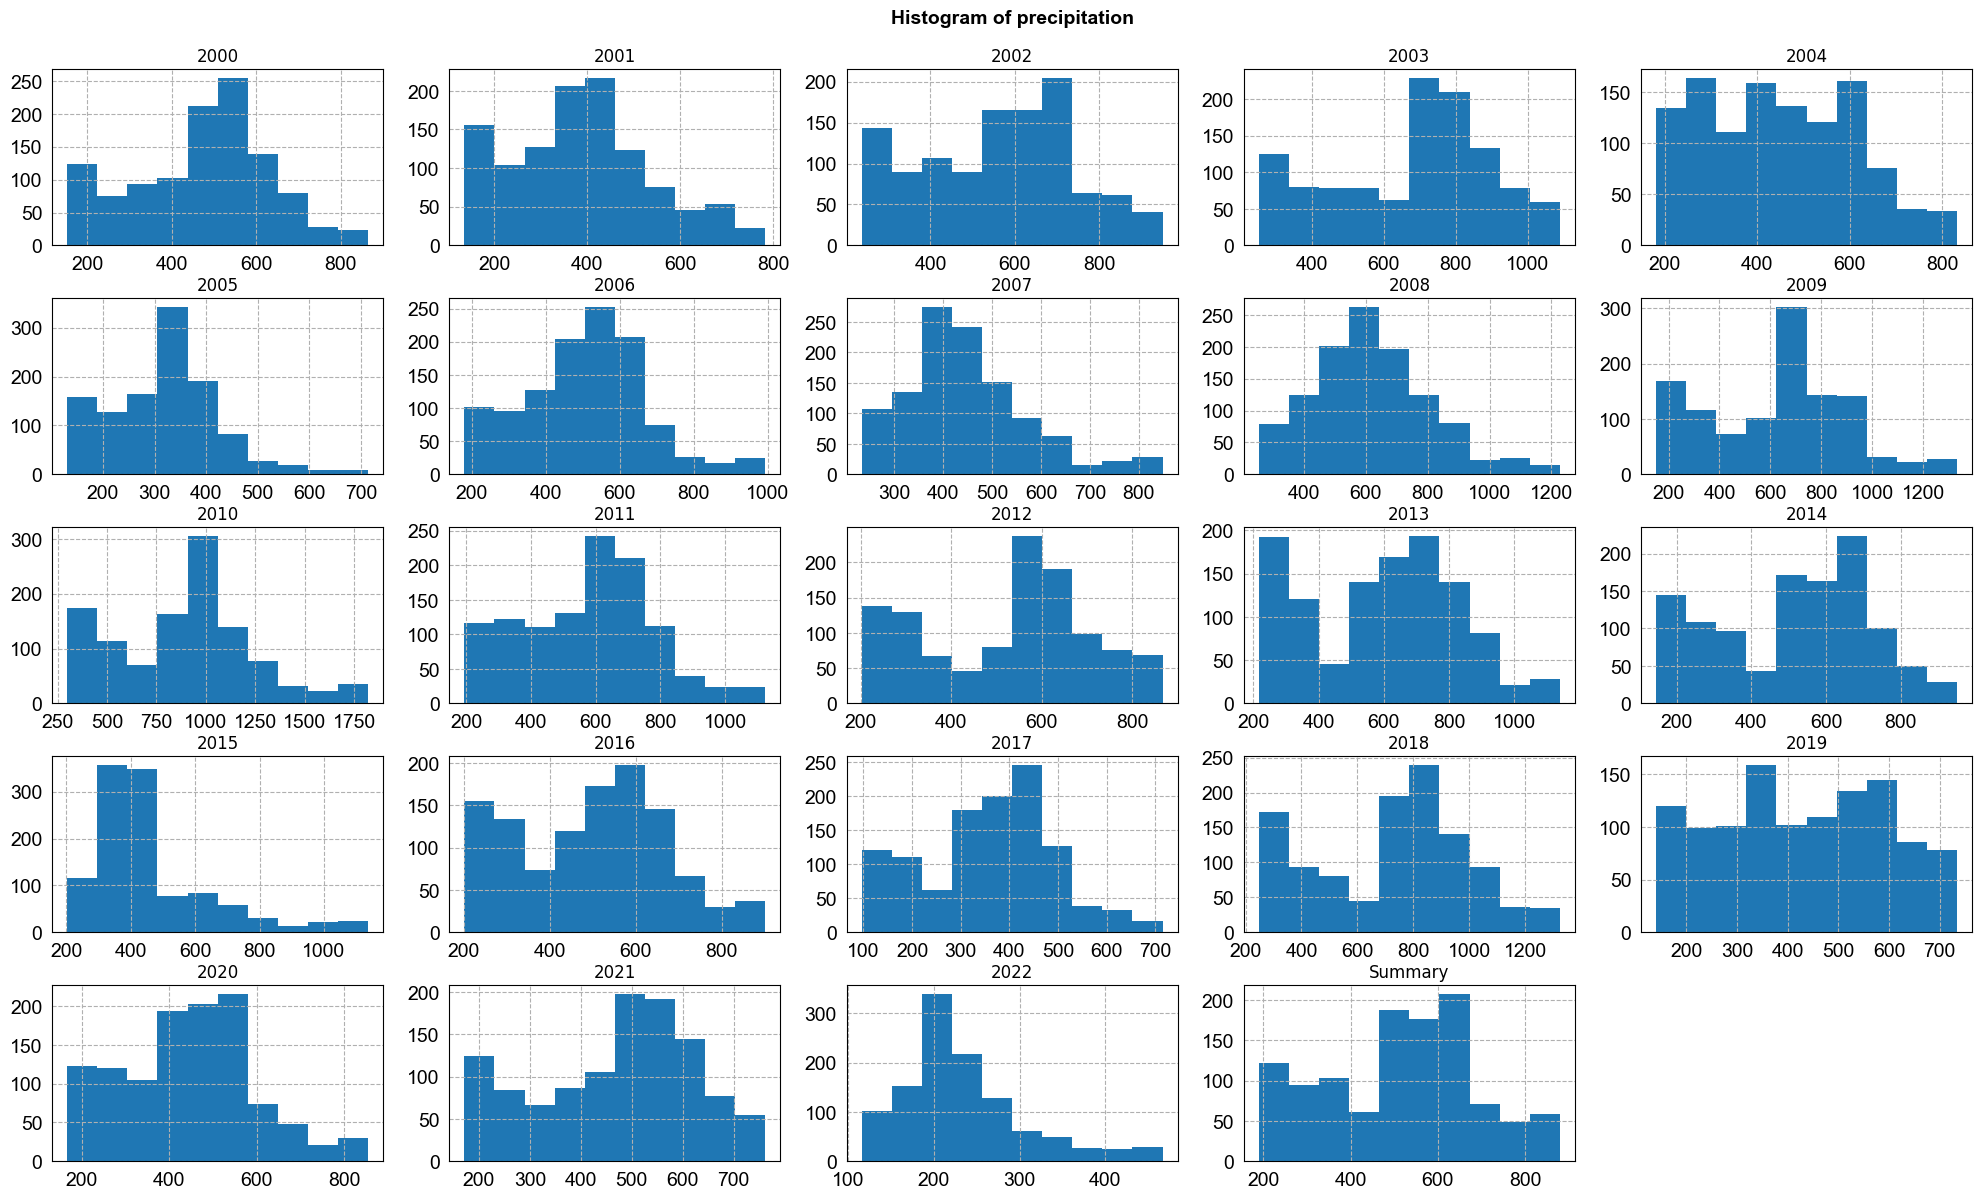

In [31]:
plt.figure(figsize=(20, 12))
plt.suptitle('Histogram of precipitation', fontproperties=dict(family='Arial', size=14, weight='bold'))
with fiona.open(r"G:\My Drive\elinor_climate_input\shp\new_subhumid.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
plot_title = [str(i) for i in range(2000, 2023)] + ["Summary"]
for idx, year in enumerate(plot_title):
    with rasterio.open(r"G:\My Drive\elinor_climate_input\GEE_results\prcp_sum_" + year + ".tif") as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta
        out_image = out_image.squeeze()
        out_image[out_image==0] = float('nan')
    plt.subplot(5,5,idx+1)
    plt.title(year)
    plt.hist(out_image.flatten(), bins=10)
    set_plot_ticks(plt.gca(), size=14)
    plt.grid(ls='--')
plt.subplots_adjust(top=0.93, left=0.02, right=0.98, bottom=0.02, hspace=0.3, wspace=0.2)
plt.savefig(r"G:\My Drive\elinor_climate_input\figures\prcp_sum_hist.jpg")